**Practical 9**<br>
Part 1: Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for
distribution of age with respect to each gender along with the information about whether
they survived or not. (Column names : 'sex' and 'age')

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data= sn.load_dataset('titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data['age'].isnull().sum()

177

In [5]:
data['sex'].isnull().sum()

0

In [6]:
data['survived'].isnull().sum()

0

In [7]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age

In [8]:
data['age'] = data[['age','pclass']].apply(impute_age,axis=1)

In [9]:
data['age'].isnull().sum()

0

<AxesSubplot:xlabel='survived', ylabel='age'>

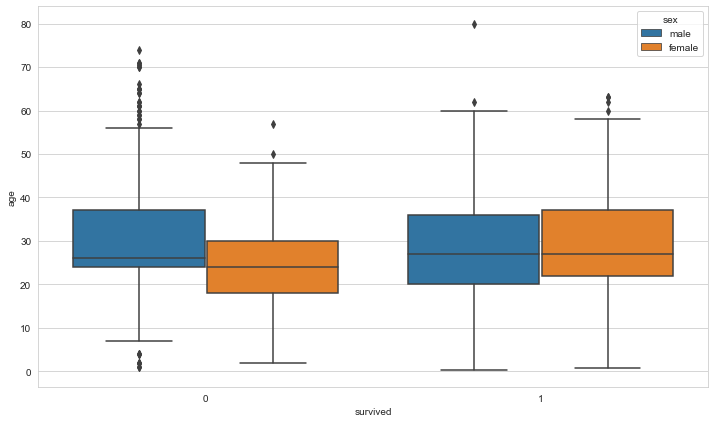

In [10]:
sn.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sn.boxplot(x='survived',y='age',hue='sex',data=data)

Part 2: Write observations on the inference from the above statistics.

| Quartile | Not Survived |         | Survived |         |
|----------|--------------|---------|----------|---------|
|          | M            | F       | M        | F       |
|----------|--------------|---------|----------|---------|
| First    | 8 - 23       | 2 - 18  | 0 - 20   | 0 - 22  |
| Second   | 24 - 26      | 19 - 24 | 21 - 26  | 23 - 26 |
| Third    | 27 - 38      | 25 - 30 | 27 - 36  | 27 - 37 |
| Fourth   | 39 - 57      | 31 - 48 | 37 - 60  | 38 - 59 |